# Day and Night Image Classifier
---

The day/night image dataset consists of 400 RGB color images in two categories: day and night. There are equal numbers of each example: 200 day images and 200 night images.

*Note: All images come from the [AMOS dataset](http://cs.uky.edu/~jacobs/datasets/amos/) (Archive of Many Outdoor Scenes).*


Table of content

* [Import resources](#section1)
* [Input data](#section2)
* [Pre-processing](#section3)
* [Feature extraction](#section4)
* [Prediction / Recognition](#section5)

<a id='section1'></a>
## Import resources

Import the libraries and resources that you'll need.

In [1]:
import cv2
import utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg

%matplotlib inline

<a id='section2'></a>
## Input data

#### Training and Testing Data
The 400 day/night images are separated into training and testing datasets. 

* 60% of these images are training images, for you to use as you create a classifier.
* 40% are test images, which will be used to test the accuracy of your classifier.

First, we set some variables to keep track of some where our images are stored:

    image_dir_training: the directory where our training image data is stored
    image_dir_test: the directory where our test image data is stored

In [2]:
# Image data directories
image_dir_training = "data/day_night_images/training/"
image_dir_test = "data/day_night_images/test/"

#### Load the datasets

In [20]:
# Using the load_dataset function in utils.py
# Load training data
IMAGE_LIST = utils.load_dataset(image_dir_training)
# Load testing data
test_IMAGE_LIST = utils.load_dataset(image_dir_test)


<a id='section3'></a>
## Pre-processing


#### Construct a `STANDARDIZED_LIST` of input images and output labels.

This function takes in a list of image-label pairs and outputs a **standardized** list of resized images and numerical labels.

In [21]:
# Standardize all training images
STANDARDIZED_LIST = utils.standardize(IMAGE_LIST)
# Standardize all test images
test_STANDARDIZED_LIST = utils.standardize(test_IMAGE_LIST)

#### Visualize the standardized data

Display a standardized image from STANDARDIZED_LIST and its label.

Shape: (600, 1100, 3)
Label [1 = day, 0 = night]: 1


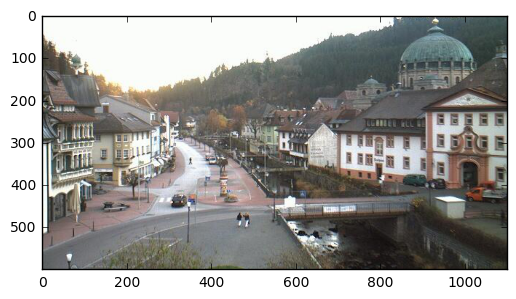

In [22]:
# Select an image by index
image_num = 0
selected_image = STANDARDIZED_LIST[image_num][0]
selected_label = STANDARDIZED_LIST[image_num][1]

# Display image and data about it
plt.imshow(selected_image)
print("Shape: "+str(selected_image.shape))
print("Label [1 = day, 0 = night]: " + str(selected_label))


<a id='section4'></a>

## Feature Extraction

Create a feature that represents the brightness in an image. We'll be extracting the **average brightness** using HSV colorspace. Specifically, we'll use the V channel (a measure of brightness), add up the pixel values in the V channel, then divide that sum by the area of the image to get the average Value of the image.


---
####  Find the average brigtness using the V channel

This function takes in a **standardized** RGB image and returns a feature (a single value) that represent the average level of brightness in the image. We'll use this value to classify the image as day or night.

In [9]:
# Find the average Value or brightness of an image
def avg_brightness(rgb_image):
    # Convert image to HSV
    hsv = cv2.cvtColor(rgb_image, cv2.COLOR_RGB2HSV)

    # Add up all the pixel values in the V channel
    sum_brightness = np.sum(hsv[:,:,2])
    a = rgb_image.shape
    area = a[0]*a[1]  # pixels
    
    # find the avg
    avg = sum_brightness/area
    
    return avg

Avg brightness: 119.6223


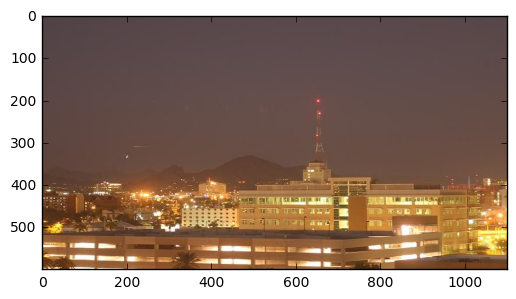

In [10]:
# Testing average brightness levels
# Look at a number of different day and night images and think about 
# what average brightness value separates the two types of images

# As an example, a "night" image is loaded in and its avg brightness is displayed
image_num = 190
test_im = STANDARDIZED_LIST[image_num][0]

avg = avg_brightness(test_im)
print('Avg brightness: ' + str(avg))
plt.imshow(test_im)

<a id='section5'></a>
# Prediction / Recognition
## Classification and Visualizing Error

In this section, we'll turn our average brightness feature into a classifier that takes in a standardized image and returns a `predicted_label` for that image. This `estimate_label` function should return a value: 0 or 1 (night or day, respectively).

In [15]:
# This function should take in RGB image input
def estimate_label(rgb_image,threshold):
    
    # Extract average brightness feature from an RGB image 
    avg = avg_brightness(rgb_image)
        
    # Use the avg brightness feature to predict a label (0, 1)
    predicted_label = 0

    if(avg > threshold):
        # if the average brightness is above the threshold value, we classify it as "day"
        predicted_label = 1
    # else, the pred-cted_label can stay 0 (it is predicted to be "night")
    
    return predicted_label    
    

### Testing the classifier

Here is where we test your classification algorithm using our test set of data that we set aside at the beginning of the notebook!

Since we are using a pretty simple brightess feature, we may not expect this classifier to be 100% accurate. We'll aim for around 75-85% accuracy usin this one feature.


### Test dataset

We use below standarize test dataset and then **shuffle** it; this ensures that order will not play a role in testing accuracy.


In [16]:
import random

# Shuffle the standardized test data
random.shuffle(test_STANDARDIZED_LIST)

## Determine the Accuracy

Compare the output of your classification algorithm (a.k.a. your "model") with the true labels and determine the accuracy.

This code stores all the misclassified images, their predicted labels, and their true labels, in a list called `misclassified`.

In [17]:
# Constructs a list of misclassified images given a list of test images and their labels
def get_misclassified_images(test_images,label_thresh):
    # Track misclassified images by placing them into a list
    misclassified_images_labels = []

    # Iterate through all the test images
    # Classify each image and compare to the true label
    for image in test_images:

        # Get true data
        im = image[0]
        true_label = image[1]

        # Get predicted label from your classifier
        predicted_label = estimate_label(im,label_thresh)

        # Compare true and predicted labels 
        if(predicted_label != true_label):
            # If these labels are not equal, the image has been misclassified
            misclassified_images_labels.append((im, predicted_label, true_label))
            
    # Return the list of misclassified [image, predicted_label, true_label] values
    return misclassified_images_labels


In [23]:
# Find all misclassified images in a given test set
MISCLASSIFIED = get_misclassified_images(test_STANDARDIZED_LIST,label_thresh=120)

# Accuracy calculations
total = len(test_STANDARDIZED_LIST)
num_correct = total - len(MISCLASSIFIED)
accuracy = num_correct/total

print('Accuracy: ' + str(accuracy))
print("Number of misclassified images = " + str(len(MISCLASSIFIED)) +' out of '+ str(total))

Accuracy: 0.86875
Number of misclassified images = 21 out of 160


---
<a id='task9'></a>
### Visualize the misclassified images

Visualize some of the images you classified wrong (in the `MISCLASSIFIED` list) and note any qualities that make them difficult to classify. This will help you identify any weaknesses in your classification algorithm.

0
Label [1 = day, 0 = night]: 0


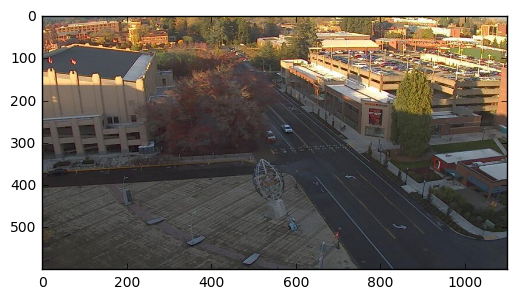

In [26]:
# Visualize misclassified example(s)
num = 0
test_mis_im = MISCLASSIFIED[num][0]
test_mis_lbl = MISCLASSIFIED[num][1]
plt.imshow(test_mis_im)
print(str(MISCLASSIFIED[num][1]))
print("Label [1 = day, 0 = night]: " + str(test_mis_lbl))

#### Plot the accuracy moving the threshold

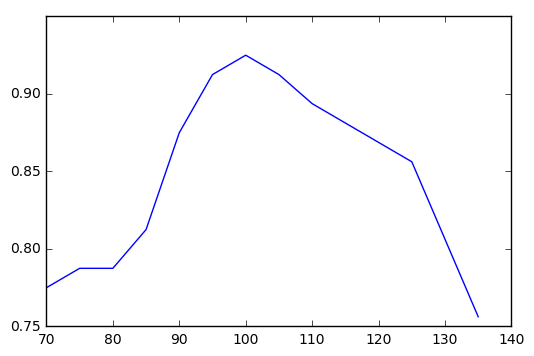

In [30]:
# Find all misclassified images in a given test set with moving threshold
y = []
for i in range(70,140,5):
    MISCLASSIFIED = get_misclassified_images(test_STANDARDIZED_LIST,label_thresh=i)

    # Accuracy calculations
    total = len(test_STANDARDIZED_LIST)
    num_correct = total - len(MISCLASSIFIED)
    accuracy = num_correct/total
    y.append(accuracy)

    
plt.plot(range(70,140,5),y)

we can zoom a little bit this plot... and select the best threshold to use

best accuracy is:  0.9375


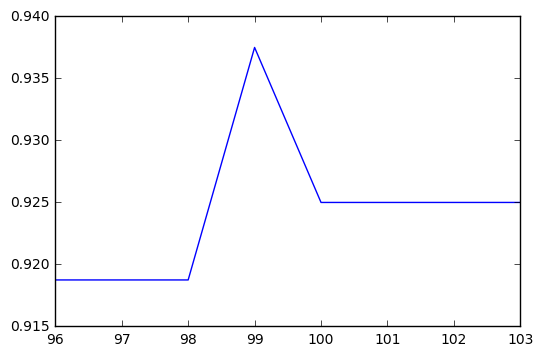

In [32]:
# Find all misclassified images in a given test set with moving threshold
y = []
for i in range(96,104,1):
    MISCLASSIFIED = get_misclassified_images(test_STANDARDIZED_LIST,label_thresh=i)

    # Accuracy calculations
    total = len(test_STANDARDIZED_LIST)
    num_correct = total - len(MISCLASSIFIED)
    accuracy = num_correct/total
    y.append(accuracy)

    
print('best accuracy is: ',np.amax(y))
plt.plot(range(96,104,1),y)

# 99 is your best threshold to this feature